<a href="https://colab.research.google.com/github/GabrielaRomoM/DIP-2024-2/blob/main/Trabajo%20en%20Clase/Redes_240125.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$X^{NxM}$

$Y^{Nx1}$

$f: \mathbf{R}^{NxM} -----> \mathbf{R}^{Nx1}$

N = número de filas

M = número de columnas

y = W1*X1+W2*X2+b

y = W1*X1+W2*X2+W0*X0 --> W0 = b, X0 = 1

Y = [W1,W2,W0][X1,X2,1].T

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

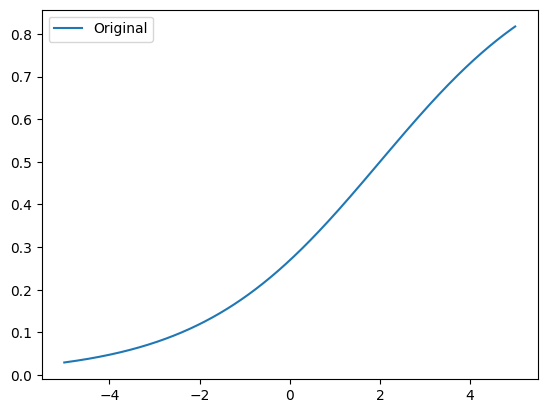

In [ ]:
N = 500
x = np.linspace(-5, 5, N)
W1 = 0.5
W0 = -1
X = np.c_[x, np.ones(N)]
W = np.array([W1, W0])
Y = np.dot(X, W)
Y = sigmoid(Y)


#var = 1
#noise = np.sqrt(var)*np.random.rand(N) #np.random.normal(0, var, N)
#Yn = Y + noise
#plt.plot(x,Yn, label = 'Ruido')

plt.plot(x,Y, label = 'Original')
plt.legend()
plt.show()

In [ ]:
X.shape, Y.shape

((500, 2), (500,))

In [203]:
modelo = tf.keras.Sequential()
modelo.add(tf.keras.layers.Dense(12,activation='tanh',input_shape=(2,)))
modelo.add(tf.keras.layers.Dense(4,activation='tanh'))
modelo.add(tf.keras.layers.Dense(1,activation='tanh'))

In [204]:
modelo.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss='mse')

In [205]:
modelo.fit(X,Y,epochs=100)

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1866  
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0439 
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0198 
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0143 
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0119 
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0117 
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0105 
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0105 
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0095 
Epoch 10/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0082 
Epoch 11/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0078 
Epoch 12/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0070 
Epoch 13/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0069  
Epoch 14/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0065  
Epoch 15/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - 

In [206]:
Ye = modelo.predict(X)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [207]:
modelo.layers[0].get_weights()

[array([[ 0.13326135,  0.3614323 , -0.09125913,  0.46821395, -0.12856396,
          0.47056127, -0.53060204,  0.20826502,  0.3399005 ,  0.4042252 ,
          0.6472332 ,  0.4653852 ],
        [-0.09219624, -0.0727765 ,  0.4677393 ,  0.35437077,  0.3366423 ,
          0.42155585,  0.48925376, -0.06404424,  0.36814973, -0.5900772 ,
         -0.37823445,  0.6133532 ]], dtype=float32),
 array([-0.01994544, -0.00113536,  0.01993533, -0.01561657,  0.01721413,
        -0.00209581,  0.01853718, -0.02071451, -0.01361676, -0.0440199 ,
         0.03258451,  0.01321942], dtype=float32)]

In [208]:
error = abs(Y-Ye).mean()

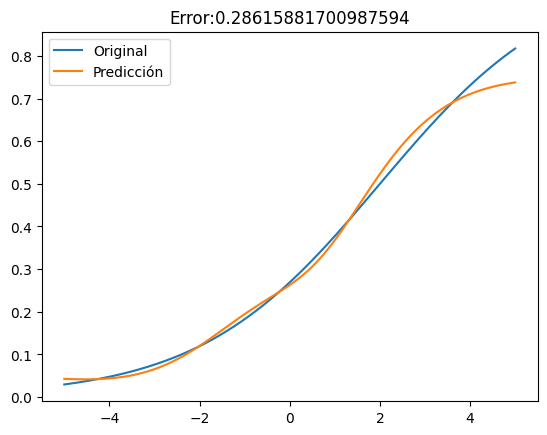

In [209]:
plt.plot(x,Y, label = 'Original')
plt.plot(x,Ye, label = 'Predicción')
plt.title(f'Error:{error}')
plt.legend()
plt.show()